# Spectral representations
## Spectrograms and mel-spectrograms

Let's compute a typical feature map for deep learning with CNNs: a mel-spectrogram. Based on a perceptual [Mel scale](https://en.wikipedia.org/wiki/Mel_scale), they are often used instead of original spectrograms because of a lower dimensionality in terms of frequency bins.

We will also compute a classic spectrogram as well as a [LogSpectrum](https://essentia.upf.edu/documentation/reference/std_LogSpectrum.html), with a log-frequency scale.

For normalization to a dB scale we are using [UnaryOperator](https://essentia.upf.edu/documentation/reference/std_UnaryOperator.html). It provides many options for scaling values inside vectors.

In [11]:
# For embedding audio player
import IPython

# Plots
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6)

In [12]:
audio_file = '../../../test/audio/recorded/techno_loop.mp3'
IPython.display.Audio(audio_file)

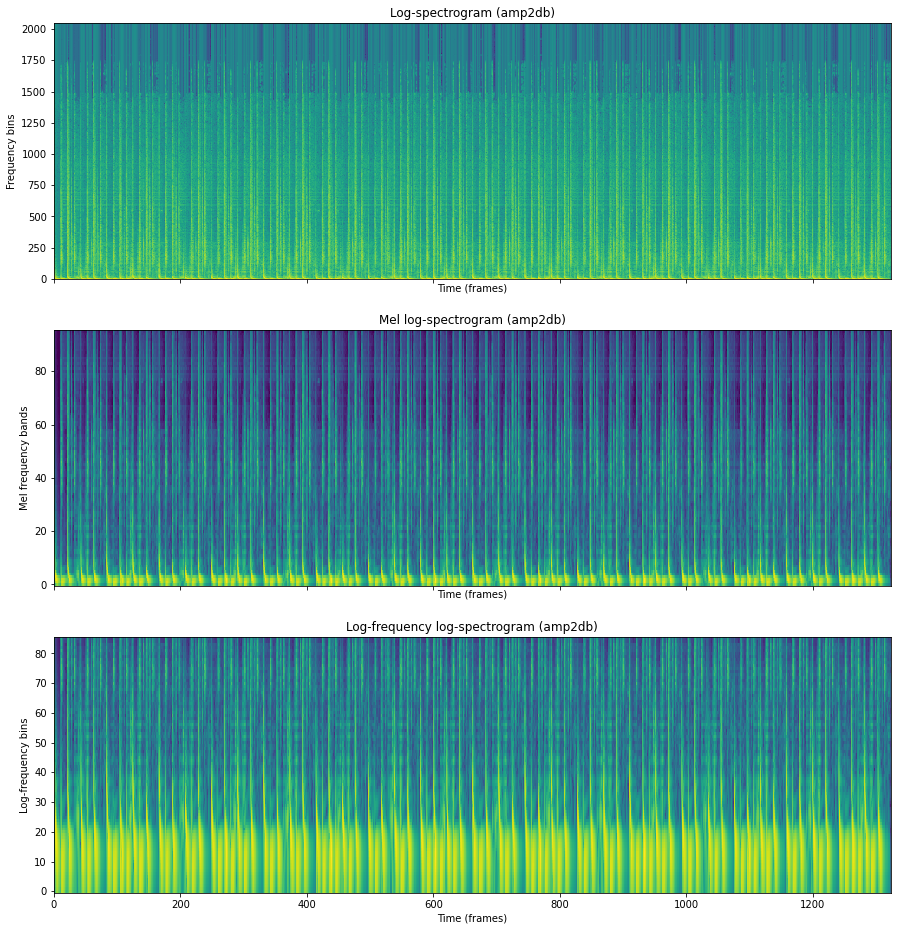

In [21]:
import essentia.standard as es
import essentia

audio = es.MonoLoader(filename=audio_file)()
windowing = es.Windowing(type='blackmanharris62', zeroPadding=2048)
spectrum = es.Spectrum()
melbands = es.MelBands(numberBands=96, lowFrequencyBound=0, highFrequencyBound=11000)
spectrum_logfreq = es.LogSpectrum(binsPerSemitone=1)

amp2db = es.UnaryOperator(type='lin2db', scale=2)
pool = essentia.Pool()

for frame in es.FrameGenerator(audio, frameSize=2048, hopSize=1024):
    frame_spectrum = spectrum(windowing(frame))
    frame_mel = melbands(frame_spectrum)
    frame_spectrum_logfreq, _, _ = spectrum_logfreq(frame_spectrum)
    
    pool.add('spectrum_db', amp2db(frame_spectrum))
    pool.add('mel96_db', amp2db(frame_mel))
    pool.add('spectrum_logfreq_db', amp2db(frame_spectrum_logfreq))

    
# Plot all spectrograms.
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(15, 16))

ax1.set_title("Log-spectrogram (amp2db)")
ax1.set_xlabel("Time (frames)")
ax1.set_ylabel("Frequency bins")
ax1.imshow(pool['spectrum_db'].T, aspect = 'auto', origin='lower', interpolation='none')

ax2.set_title("Mel log-spectrogram (amp2db)")
ax2.set_xlabel("Time (frames)")
ax2.set_ylabel("Mel frequency bands")
ax2.imshow(pool['mel96_db'].T, aspect = 'auto', origin='lower', interpolation='none')

ax3.set_title("Log-frequency log-spectrogram (amp2db)")
ax3.set_xlabel("Time (frames)")
ax3.set_ylabel("Log-frequency bins")
ax3.imshow(pool['spectrum_logfreq_db'].T, aspect = 'auto', origin='lower', interpolation='none')

"""
imshow(pool['spectrum_db'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-spectrogram (amp2db)")
show()

imshow(pool['mel96_db'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel log-spectrogram (amp2db)")
show()

imshow(pool['spectrum_logfreq_db'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-frequency log-spectrogram (amp2db)")
"""
show()